# Import

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Reading the table

In [37]:
data = pd.read_csv('csgo_round_snapshots.csv')
data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [38]:
data.shape

(122410, 97)

# Cleaning the data

In [39]:
missing_values = data.isnull().sum()
missing_values.sum()

0

In [40]:
duplicates = data.duplicated()
total_duplicates = duplicates.sum()
print(f'Total number of dublicates: {total_duplicates}')

Total number of dublicates: 4962


# Eliminating Duplicates: 

In [41]:
data = data.drop_duplicates()
print("the updated number of rows:", len(data))

the updated number of rows: 117448


# Checking & Removing outliers

In [42]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print("Data after removing ourliers:", data.shape)

Data after removing ourliers: (4076, 97)


# Correlations

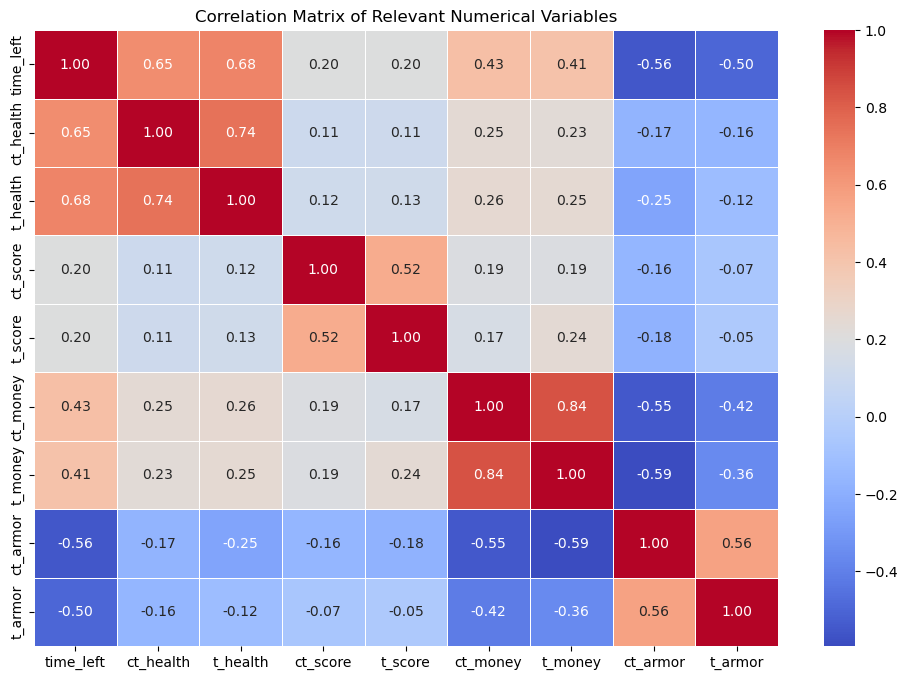

In [48]:
relevant_columns = ['time_left', 'ct_health', 't_health', 'ct_score', 't_score',
                    'ct_money', 't_money','ct_armor', 't_armor']

relevant_data = data[relevant_columns]

corr_matrix = relevant_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Relevant Numerical Variables')
plt.show()

# Making linear regression model

This code will fit a linear regression model using time-related variables, player attributes (armor, money), and team-specific attributes as independent variables and Counter-Terrorist (ct_health) player health as the dependent variable. It gives prediction of player health for the test set and visualize the relationship between the actual and predicted player health

Linear Regression Metrics:
R-squared: 0.9065405107735868
Mean Squared Error (MSE): 236.50714017153535
Mean Absolute Error (MAE): 6.369450603357925


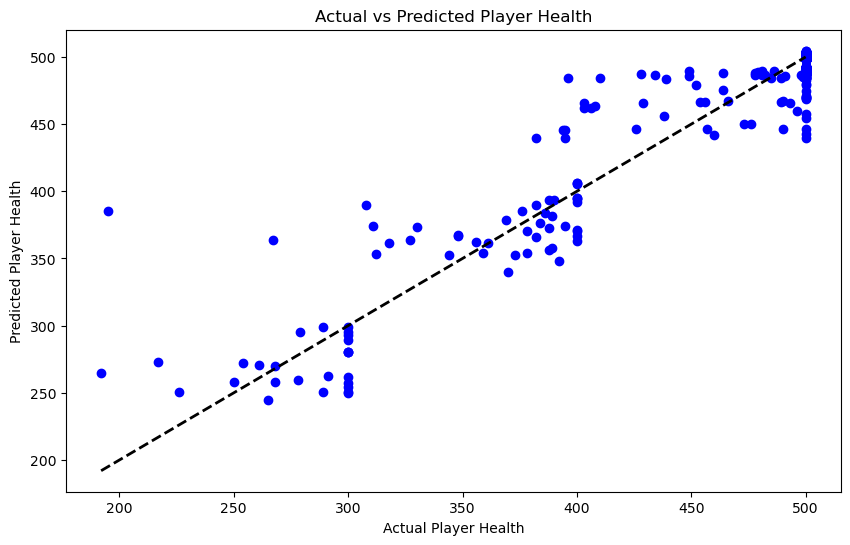

In [49]:
X = data[['time_left', 'ct_armor', 't_armor', 'ct_money', 't_money',
          'ct_players_alive', 't_players_alive']]
y = data['ct_health']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Metrics:")
print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Player Health')
plt.ylabel('Predicted Player Health')
plt.title('Actual vs Predicted Player Health')
plt.show()
